Example 1 - Number of DOF influence in Natural Frequency
=========
In this example, we use the rotor seen in Example 5.8.1 from 'Dynamics of Rotating Machinery' by MI Friswell, JET Penny, SD Garvey & AW Lees, published by Cambridge University Press, 2010. Which is a symmetric rotor with a single disk in the center. The shaft is hollow with an outside diameter of $80 mm$, an inside
diameter of $30 mm$, and a length of $1.2 m$ and it is modeled using Euler-Bernoulli elements, with no internal shaft damping.
The bearings are rigid and short and the disk has a diameter of $400 mm$ and a thickness
of $80 mm$.
The disk and shaft elements are made of steel.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ross as rs
from bokeh.io import output_notebook
output_notebook()
from bokeh.io.showing import show

Loading BokehJS ...

In [2]:
steel = rs.materials.steel

In [3]:
number_of_elements = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 40, 60]

In [4]:
def create_rotor(n_el):
    """Create example rotor with given number of elements."""
    shaft = [
        rs.ShaftElement(1.2/(n_el), i_d=0.03, o_d=0.08, material=steel)
        for i in range(n_el)
    ]

    disks = [
        rs.DiskElement.from_geometry(n=(n_el / 2), material=steel,
                                     width=0.08, i_d=0.08, o_d=0.4)
    ]

    bearings = [
        rs.BearingElement(0, kxx=1e15, cxx=0),
        rs.BearingElement(n_el, kxx=1e15, cxx=0)
    ]
    
    return rs.Rotor(shaft, disks, bearings, sparse=False)

In [5]:
def analysis(speed):
    """Perform convergence analysis for a given speed."""
    # create reference rotor with 80 elements
    rotor_80 = create_rotor(80)
    rotor_80.w = speed
    rotor_80.run_modal()

    n_eigen = 8 
    errors = np.zeros([len(number_of_elements), n_eigen])

    for i, n_el in enumerate(number_of_elements):
        rotor = create_rotor(n_el)
        rotor.w = speed
        rotor.run_modal()
        errors[i, :] = abs(
            100 * (rotor.wn[:n_eigen] - rotor_80.wn[:n_eigen]) 
            / rotor_80.wn[:n_eigen])
        
    fig, ax = plt.subplots()
    ax.set_xlabel('Number of degrees of freedom')
    ax.set_ylabel('Natural Frequency Error(%)')
    for i in range(8):
        ax.semilogy(number_of_elements, errors[:, i])

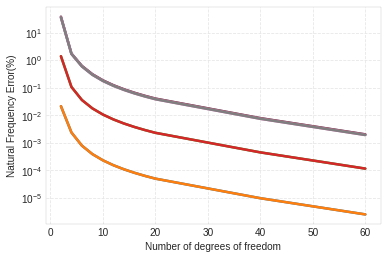

In [6]:
analysis(speed=0)

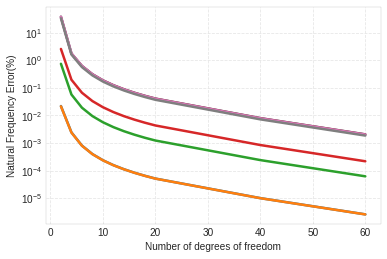

In [7]:
analysis(speed=5000*np.pi/30)

In [8]:
rotor_10 = create_rotor(10)
rotor_10.w = 4000*np.pi/30
rotor_10.run_modal()

+ Campbell Diagram


In [11]:
speed_range = np.linspace(0,4000*np.pi/30,100)
campbell = rotor_10.run_campbell(speed_range)
show(campbell.plot(plot_type='bokeh'))